# Data Importing and Preprocessing and Feature Engineering Steps:

In [17]:
import pandas as pd

# Load the dataset
file_path = '/content/fraudData.csv'
df = pd.read_csv(file_path)

# Check for duplicates and remove them
df = df.drop_duplicates()

# Check for null values and drop rows with nulls (can also impute, if necessary)
df = df.dropna()

# Display basic information about the cleaned dataset
df_info = {
    "shape": df.shape,
    "null_counts": df.isnull().sum().to_dict(),
    "duplicates": df.duplicated().sum()
}

df_info

{'shape': (594643, 10),
 'null_counts': {'step': 0,
  'customer': 0,
  'age': 0,
  'gender': 0,
  'zipcodeOri': 0,
  'merchant': 0,
  'zipMerchant': 0,
  'category': 0,
  'amount': 0,
  'fraud': 0},
 'duplicates': np.int64(0)}

In [18]:
# Display basic info and first few rows
print("Dataset Info:")
print(df.info())
print("\
First few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None
First few rows:
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  

In [19]:
# Check for missing values and unique values in categorical columns
print("Missing values per column:")
print(df.isnull().sum())

# Check unique values in categorical columns
categorical_columns = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in categorical_columns:
    print("\
Unique values in", col, ":")
    print(df[col].unique())

Missing values per column:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64
Unique values in customer :
["'C1093826151'" "'C352968107'" "'C2054744914'" ... "'C1014783484'"
 "'C849065220'" "'C1809646275'"]
Unique values in gender :
["'M'" "'F'" "'E'" "'U'"]
Unique values in zipcodeOri :
["'28007'"]
Unique values in merchant :
["'M348934600'" "'M1823072687'" "'M50039827'" "'M1888755466'"
 "'M1053599405'" "'M85975013'" "'M480139044'" "'M692898500'"
 "'M348875670'" "'M151143676'" "'M840466850'" "'M1741626453'"
 "'M1535107174'" "'M855959430'" "'M349281107'" "'M209847108'"
 "'M2122776122'" "'M1873032707'" "'M2011752106'" "'M857378720'"
 "'M1198415165'" "'M1748431652'" "'M980657600'" "'M1352454843'"
 "'M117188757'" "'M547558035'" "'M17379832'" "'M1649169323'"
 "'M1946091778'" "'M97925176'" "'M923029380'" "'M1353266412'"
 "'M1842530320'" "'M677738360'" "'M131368

In [20]:
# Feature Engineering: Encoding categorical variables and creating new features
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Clean and convert age column
df['age'] = df['age'].str.replace("'", "")
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# errors='coerce' is a special parameter that:
# Attempts to convert values to numbers
# If a value can't be converted (like text), it turns that value into NaN (Not a Number)
# This prevents the entire conversion from failing if there are some problematic entries

# Encode categorical variables
label_encoders = {}
categorical_columns = ['customer', 'gender', 'merchant', 'category']
for col in categorical_columns:
    df[col] = df[col].str.replace("'", "")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Create new features
df['log_amount'] = np.log1p(df['amount'])
df['age_amount_interaction'] = df['age'] * df['amount']

# Time-based features from 'step'
df['hour_of_day'] = df['step'] % 24
df['day_of_week'] = (df['step'] // 24) % 7

print("Sample of engineered features:")
print(df[['age', 'log_amount', 'age_amount_interaction', 'hour_of_day', 'day_of_week']].head())

Sample of engineered features:
   age  log_amount  age_amount_interaction  hour_of_day  day_of_week
0  4.0    1.713798                   18.20            0            0
1  2.0    3.705737                   79.36            0            0
2  4.0    3.328268                  107.56            0            0
3  3.0    2.904165                   51.75            0            0
4  5.0    3.603322                  178.60            0            0


In [21]:
# Check data types of all columns to identify non-numeric columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
step                        int64
customer                    int64
age                       float64
gender                      int64
zipcodeOri                 object
merchant                    int64
zipMerchant                object
category                    int64
amount                    float64
fraud                       int64
log_amount                float64
age_amount_interaction    float64
hour_of_day                 int64
day_of_week                 int64
dtype: object


In [22]:
# Clean object-type columns by removing quotes
df['zipcodeOri'] = df['zipcodeOri'].str.replace("'", "")
df['zipMerchant'] = df['zipMerchant'].str.replace("'", "")

In [23]:
# Check data types of all columns to identify non-numeric columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
step                        int64
customer                    int64
age                       float64
gender                      int64
zipcodeOri                 object
merchant                    int64
zipMerchant                object
category                    int64
amount                    float64
fraud                       int64
log_amount                float64
age_amount_interaction    float64
hour_of_day                 int64
day_of_week                 int64
dtype: object


In [24]:
# Print the count of null values for each column
null_counts = df.isnull().sum()
print("Null values count in each column:")
print(null_counts)

Null values count in each column:
step                         0
customer                     0
age                       1178
gender                       0
zipcodeOri                   0
merchant                     0
zipMerchant                  0
category                     0
amount                       0
fraud                        0
log_amount                   0
age_amount_interaction    1178
hour_of_day                  0
day_of_week                  0
dtype: int64


In [25]:
df.dropna(inplace=True)

In [26]:
# Print the count of null values for each column
null_counts = df.isnull().sum()
print("Null values count in each column:")
print(null_counts)

Null values count in each column:
step                      0
customer                  0
age                       0
gender                    0
zipcodeOri                0
merchant                  0
zipMerchant               0
category                  0
amount                    0
fraud                     0
log_amount                0
age_amount_interaction    0
hour_of_day               0
day_of_week               0
dtype: int64


In [27]:
# Import necessary libraries for ensemble learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].drop('fraud', axis=1)
y = df['fraud']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensemble Methods

## Random Forest Model:

In [28]:
# Initialize ensemble model
rf_model = RandomForestClassifier(random_state=42)
# random_state=42:
# Means that every time you run the model with the same data and this random_state,
# you'll get exactly the same results, Without this, the model would generate slightly
# different trees each time it's run due to randomness in tree creation.

# Train the model
rf_model.fit(X_train, y_train)

# Make prediction
rf_preds = rf_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)

# Print accuracy
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\
Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9958660975061784
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.90      0.73      0.81      2083

    accuracy                           1.00    178040
   macro avg       0.95      0.87      0.90    178040
weighted avg       1.00      1.00      1.00    178040



### RF Model after Regularization:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest with regularization
rf_model1 = RandomForestClassifier(
    random_state=42,
    max_depth=10,              # Limits how deep each decision tree can grow
    min_samples_split=5,       # Minimum samples to split a node,
                               # Prevents creating new branches in the tree unless a node has at least 5 samples
    min_samples_leaf=3,        # Minimum samples per leaf node,
                               # Ensures that each leaf node (final decision point) contains at least 3 samples
)

# Train the model
rf_model1.fit(X_train, y_train)

# Make predictions
rf_preds1 = rf_model1.predict(X_test)

# Evaluate the model
rf_accuracy1 = accuracy_score(y_test, rf_preds1)
print("Random Forest Accuracy:", rf_accuracy1)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds1))

Random Forest Accuracy: 0.9957032127611772
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.89      0.72      0.80      2083

    accuracy                           1.00    178040
   macro avg       0.94      0.86      0.90    178040
weighted avg       1.00      1.00      1.00    178040



## Gradient Boosting Model:

In [30]:
# Initialize ensemble model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make prediction
gb_preds = gb_model.predict(X_test)

# Evaluate the models
gb_accuracy = accuracy_score(y_test, gb_preds)

# Print accuracy
print("Gradient Boosting Accuracy:", gb_accuracy)

# Classification report
print("\
Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9958773309368681
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.89      0.74      0.81      2083

    accuracy                           1.00    178040
   macro avg       0.94      0.87      0.90    178040
weighted avg       1.00      1.00      1.00    178040



### GB Model after Regularization:

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting with regularization
gb_model1 = GradientBoostingClassifier(
    random_state=42,
    max_depth=5,            # Limit tree depth

    learning_rate=0.1,      # Reduce learning rate, Controls how much each tree contributes to the final prediction
                            # A lower rate (0.1) means each tree makes a smaller, more cautious contribution

    n_estimators=100,       # Limit the number of boosting stages, Sets the number of boosting stages
                            # (sequential trees) to create Each tree tries to correct the errors of the previous trees

    subsample=0.8,          # Use a fraction of samples for training each tree
                            # Uses only 80% of the training samples for each tree
                            # Introduces randomness and helps prevent overfitting
                            # Each tree is trained on a slightly different subset of the data
)

# Train the model
gb_model1.fit(X_train, y_train)

# Make predictions
gb_preds1 = gb_model1.predict(X_test)

# Evaluate the model
gb_accuracy1 = accuracy_score(y_test, gb_preds1)
print("Gradient Boosting Accuracy:", gb_accuracy1)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds1))

Gradient Boosting Accuracy: 0.9960570658279039
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.89      0.76      0.82      2083

    accuracy                           1.00    178040
   macro avg       0.94      0.88      0.91    178040
weighted avg       1.00      1.00      1.00    178040



## XGBoost Model:

In [32]:
# Initialize ensemble model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# 1-use_label_encoder=False:
# Disables the automatic label encoding by XGBoost
# Assumes that you have already encoded categorical labels before passing them to the model
# 2-eval_metric='logloss':
# Sets the evaluation metric for the model
# 'logloss' (logarithmic loss) is used to measure the model's performance

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Print accuracy
print("XGBoost Accuracy:", xgb_accuracy)

# Classification report
print("\
XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9957874634913503
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.87      0.76      0.81      2083

    accuracy                           1.00    178040
   macro avg       0.93      0.88      0.90    178040
weighted avg       1.00      1.00      1.00    178040



### XGBoost Model after Regularization:

In [33]:
from xgboost import XGBClassifier

# Initialize XGBoost with regularization
xgb_model1 = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=5,              # Limit tree depth
    learning_rate=0.1,        # Reduce learning rate
    n_estimators=100,         # Limit number of trees

    reg_alpha=0.1,            # Add L1 regularization
                              # Adds L1 regularization (Lasso)
                              # Helps reduce model complexity
                              # Encourages sparsity by pushing some feature weights to exactly zero

    reg_lambda=0.5,           # Add L2 regularization
                              # Prevents overfitting by penalizing large weights
                              # Keeps feature weights small and distributed
                              # Helps smooth out the model's decision boundary
)

# Train the model
xgb_model1.fit(X_train, y_train)

# Make predictions
xgb_preds1 = xgb_model1.predict(X_test)

# Evaluate the model
xgb_accuracy1 = accuracy_score(y_test, xgb_preds1)
print("XGBoost Accuracy:", xgb_accuracy1)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds1))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:21:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9961637834194563
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.89      0.77      0.82      2083

    accuracy                           1.00    178040
   macro avg       0.94      0.88      0.91    178040
weighted avg       1.00      1.00      1.00    178040



# ML Models Comparison:

In [34]:
from sklearn.preprocessing import StandardScaler

## Scale Features for SVM, LR, NN.

In [35]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1-Logistic Regression

In [36]:
import numpy
from sklearn import linear_model
from sklearn import metrics

logr = linear_model.LogisticRegression()
logr.fit(X_train_scaled, y_train)
logr_preds = logr.predict(X_test_scaled)
logr_accuracy = accuracy_score(y_test, logr_preds)

#Accuracy
print("Logistic Regression Accuracy:", logr_accuracy)
#Precision Score
print("Precision:", metrics.precision_score(y_test,logr_preds))
#Recall Score
print("Recall:" , metrics.recall_score(y_test,logr_preds))
#Classification Report
print(metrics.classification_report(y_test,logr_preds))

Logistic Regression Accuracy: 0.9942990339249607
Precision: 0.8926470588235295
Recall: 0.5828132501200192
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.89      0.58      0.71      2083

    accuracy                           0.99    178040
   macro avg       0.94      0.79      0.85    178040
weighted avg       0.99      0.99      0.99    178040



Logistic Regression after Regularization:

In [37]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L2 Regularization
logr_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
logr_l2.fit(X_train_scaled, y_train)
logr_preds_l2 = logr_l2.predict(X_test_scaled)

# Logistic Regression with L1 Regularization
logr_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
logr_l1.fit(X_train_scaled, y_train)
logr_preds_l1 = logr_l1.predict(X_test_scaled)

# C=1.0: Controls regularization strength
# Smaller values increase regularization
# Larger values reduce regularization impact

# solver='liblinear': Good for smaller datasets
# Shrinks feature weights towards zero
# Prevents large weights from dominating the model

## 2-Decision Tree:

In [38]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
dtree_preds = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_preds)

#Accuracy
print("Decision Tree Accuracy:", dtree_accuracy)
#Precision Score
print("Precision:", metrics.precision_score(y_test,dtree_preds))
#Recall Score
print("Recall:" , metrics.recall_score(y_test,dtree_preds))
#Classification Report
print(metrics.classification_report(y_test,dtree_preds))

Decision Tree Accuracy: 0.9937654459671984
Precision: 0.7216400911161731
Recall: 0.7604416706673067
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.72      0.76      0.74      2083

    accuracy                           0.99    178040
   macro avg       0.86      0.88      0.87    178040
weighted avg       0.99      0.99      0.99    178040



Decision Tree after Regularization:

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with Regularization
dtree_reg = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dtree_reg.fit(X_train, y_train)
dtree_preds_reg = dtree_reg.predict(X_test)

## 3-SVM:

In [40]:
from sklearn import svm

cls = svm.LinearSVC(random_state=20)
cls.fit(X_train_scaled,y_train)
cls_preds = cls.predict(X_test_scaled)
cls_accuracy = accuracy_score(y_test, cls_preds)

#Accuracy
print("SVM Accuracy:", cls_accuracy)
#Precision Score
print("Precision:", metrics.precision_score(y_test,cls_preds))
#Recall Score
print("Recall:" , metrics.recall_score(y_test,cls_preds))
print(metrics.classification_report(y_test,cls_preds))

SVM Accuracy: 0.9935913277915075
Precision: 0.945179584120983
Recall: 0.4800768122899664
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    175957
           1       0.95      0.48      0.64      2083

    accuracy                           0.99    178040
   macro avg       0.97      0.74      0.82    178040
weighted avg       0.99      0.99      0.99    178040



SVM after Regularization:

In [41]:
from sklearn.svm import LinearSVC

# SVM with Regularization
cls_reg = LinearSVC(C=0.1, random_state=20, max_iter=1000)
cls_reg.fit(X_train_scaled, y_train)
cls_preds_reg = cls_reg.predict(X_test_scaled)

# 1- C=0.1:
# Controls the regularization strength
# Smaller values increase regularization
# Inverse of regularization parameter
# Lower C means:
# Stronger regularization
# Simpler decision boundary
# More regularization, less model complexity
# Higher C means:
# Weaker regularization
# More complex decision boundary
# Allows the model to fit training data more closely

# 2- max_iter=1000:

# Sets the maximum number of iterations for the solver
# Prevents the optimization process from running indefinitely
# Ensures the model converges or stops after a reasonable number of attempts

## 4-Neural Network(NN):

In [42]:
import tensorflow as tf

#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train_scaled,y_train,batch_size = 32,epochs = 20)

Epoch 1/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9902 - loss: 0.0492
Epoch 2/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9939 - loss: 0.0220
Epoch 3/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9943 - loss: 0.0198
Epoch 4/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9947 - loss: 0.0183
Epoch 5/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9945 - loss: 0.0184
Epoch 6/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9948 - loss: 0.0171
Epoch 7/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9947 - loss: 0.0173
Epoch 8/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9947 - loss: 0.0168
Epoch 9/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9948 - loss: 0.0161
Epoch 10/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 11/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9949 - loss: 0.01

ANN after Regularization:

In [43]:
# Regularization by adding Dropout
ann_reg = tf.keras.models.Sequential()
ann_reg.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann_reg.add(tf.keras.layers.Dropout(0.3))  # Adding dropout
ann_reg.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann_reg.add(tf.keras.layers.Dropout(0.3))  # Adding dropout
ann_reg.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile and Train ANN
ann_reg.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
ann_reg.fit(X_train_scaled, y_train, batch_size=32, epochs=20)

Epoch 1/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9782 - loss: 0.1253
Epoch 2/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9920 - loss: 0.0321
Epoch 3/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9922 - loss: 0.0317
Epoch 4/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9923 - loss: 0.0310
Epoch 5/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9922 - loss: 0.0314
Epoch 6/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9920 - loss: 0.0316
Epoch 7/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9921 - loss: 0.0314
Epoch 8/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9920 - loss: 0.0315
Epoch 9/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9922 - loss: 0.0312
Epoch 10/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9918 - loss: 0.0318
Epoch 11/20
12983/12983 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9921 - loss: 0.03

In [44]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluate the model on the test set to get loss and accuracy
loss, accuracy = ann.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Accuracy on test set: {accuracy:.2f}")

# Generate predictions
y_pred_prob = ann.predict(X_test_scaled)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 1.00
5564/5564 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175957
           1       0.83      0.74      0.78      2083

    accuracy                           1.00    178040
   macro avg       0.91      0.87      0.89    178040
weighted avg       1.00      1.00      1.00    178040



5564/5564 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


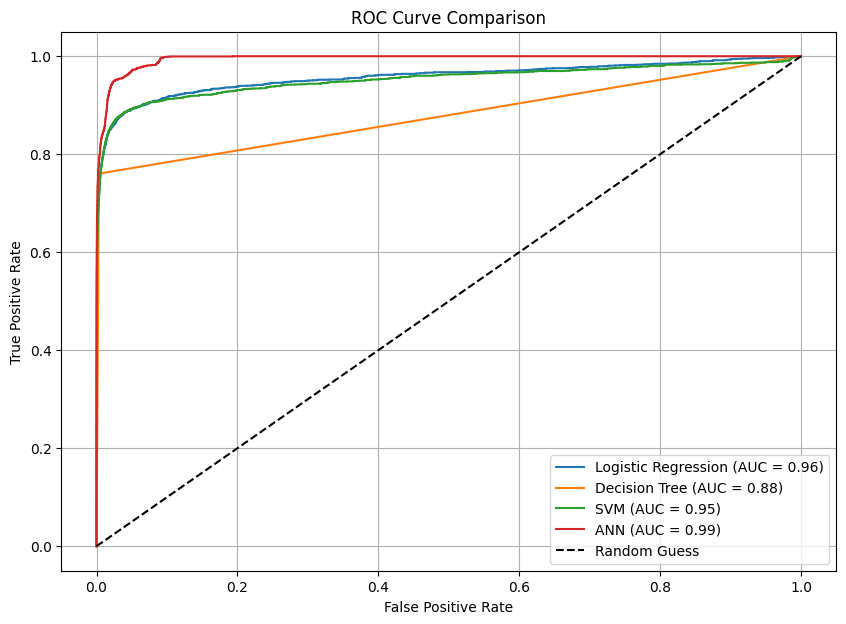

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

# Logistic Regression
logr_probs = logr.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for the positive class
logr_auc = roc_auc_score(y_test, logr_probs)
logr_fpr, logr_tpr, _ = roc_curve(y_test, logr_probs)

# Decision Tree
dtree_probs = dtree.predict_proba(X_test)[:, 1]
dtree_auc = roc_auc_score(y_test, dtree_probs)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_probs)

# SVM (LinearSVC)
# Note: LinearSVC does not have a `predict_proba` method, but `decision_function` can be used instead.
cls_scores = cls.decision_function(X_test_scaled)
cls_auc = roc_auc_score(y_test, cls_scores)
cls_fpr, cls_tpr, _ = roc_curve(y_test, cls_scores)

# ANN
ann_probs = ann.predict(X_test_scaled).ravel()  # Predicted probabilities from ANN
ann_auc = roc_auc_score(y_test, ann_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)

# Plotting AUC-ROC curves
plt.figure(figsize=(10, 7))
plt.plot(logr_fpr, logr_tpr, label=f"Logistic Regression (AUC = {logr_auc:.2f})")
plt.plot(dtree_fpr, dtree_tpr, label=f"Decision Tree (AUC = {dtree_auc:.2f})")
plt.plot(cls_fpr, cls_tpr, label=f"SVM (AUC = {cls_auc:.2f})")
plt.plot(ann_fpr, ann_tpr, label=f"ANN (AUC = {ann_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Visualizations of the Models:

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_preds, title):
    cm = confusion_matrix(y_true, y_preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

## Visualize Random Forest Model (Before and After Regularization):

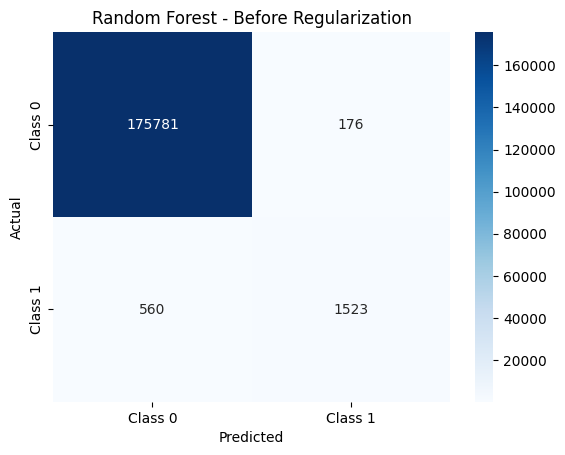

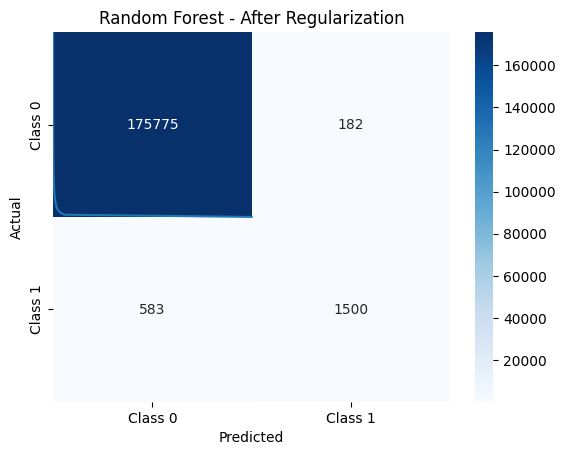

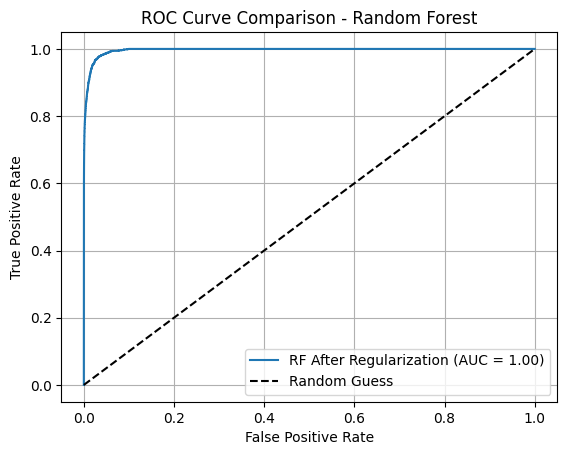

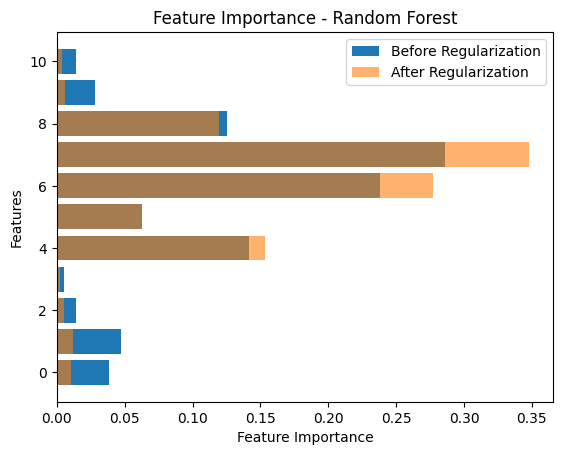

In [47]:
# Before Regularization
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
plot_confusion_matrix(y_test, rf_preds, "Random Forest - Before Regularization")
plot_roc_curve(y_test, rf_probs, "RF Before Regularization")

# After Regularization
rf_probs1 = rf_model1.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, rf_preds1, "Random Forest - After Regularization")
plot_roc_curve(y_test, rf_probs1, "RF After Regularization")

# Plot ROC Curve Comparison
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve Comparison - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

# Feature Importance for Random Forest
plt.barh(range(len(rf_model.feature_importances_)), rf_model.feature_importances_, label="Before Regularization")
plt.barh(range(len(rf_model1.feature_importances_)), rf_model1.feature_importances_, alpha=0.6, label="After Regularization")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.legend()
plt.show()

## Visualize Gradient Boosting Model (Before and After Regularization):

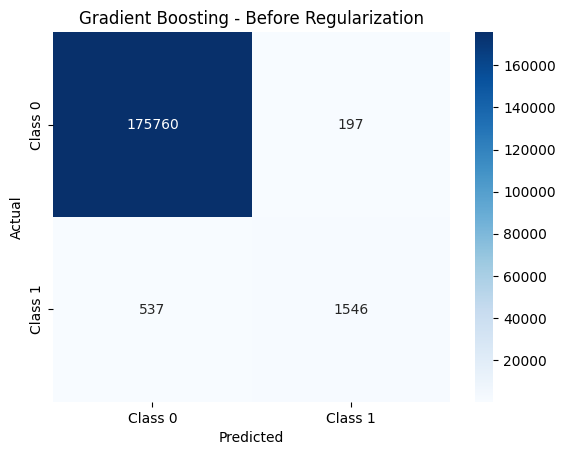

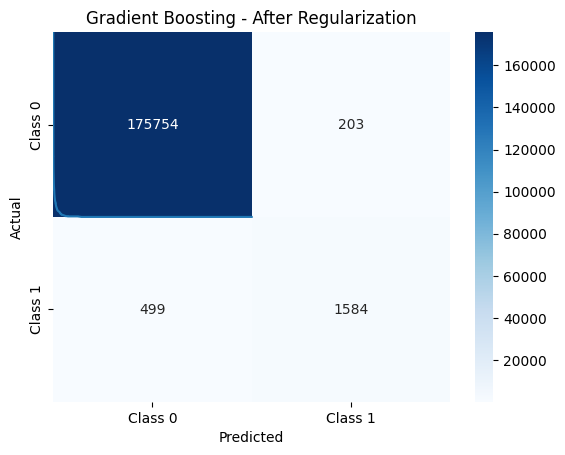

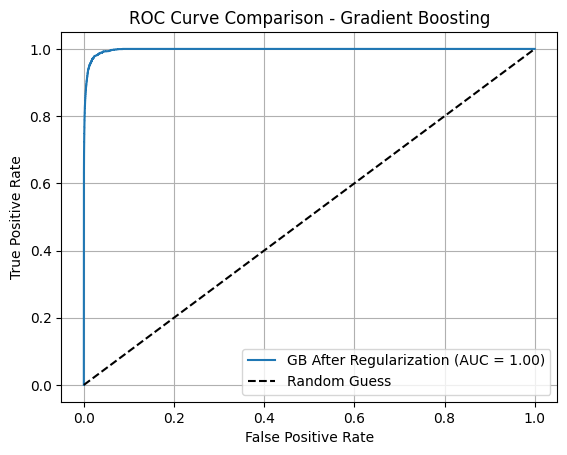

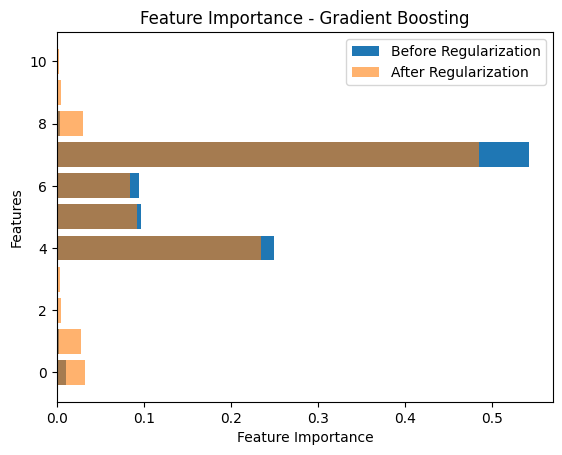

In [48]:
# Before Regularization
gb_probs = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
plot_confusion_matrix(y_test, gb_preds, "Gradient Boosting - Before Regularization")
plot_roc_curve(y_test, gb_probs, "GB Before Regularization")

# After Regularization
gb_probs1 = gb_model1.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, gb_preds1, "Gradient Boosting - After Regularization")
plot_roc_curve(y_test, gb_probs1, "GB After Regularization")

# Plot ROC Curve Comparison
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve Comparison - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

# Feature Importance for Gradient Boosting
plt.barh(range(len(gb_model.feature_importances_)), gb_model.feature_importances_, label="Before Regularization")
plt.barh(range(len(gb_model1.feature_importances_)), gb_model1.feature_importances_, alpha=0.6, label="After Regularization")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Gradient Boosting")
plt.legend()
plt.show()

## Visualize XGBoost Model (Before and After Regularization):

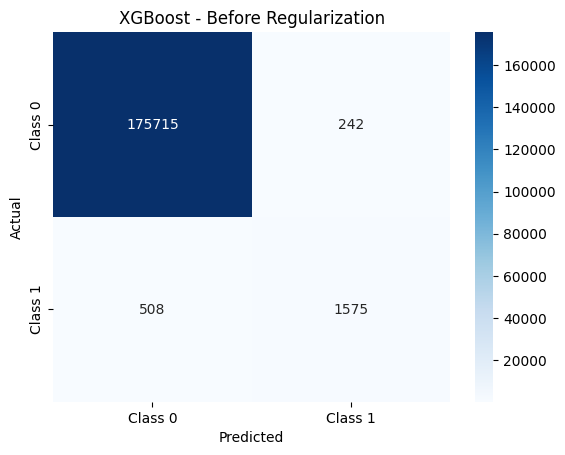

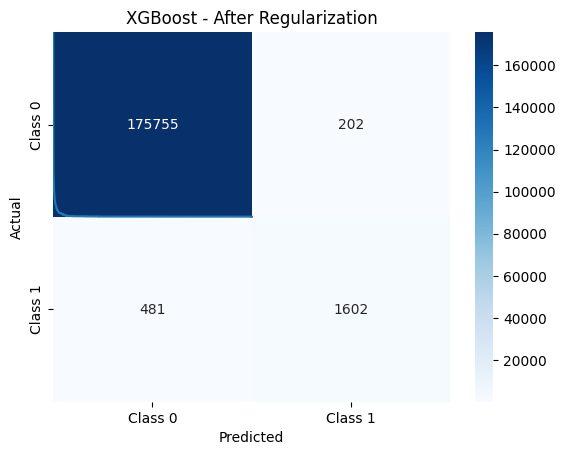

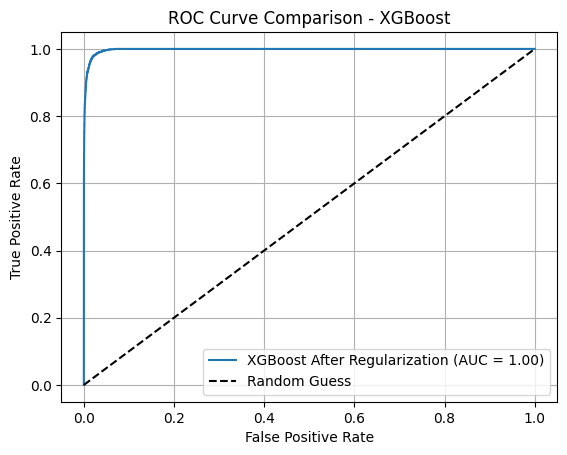

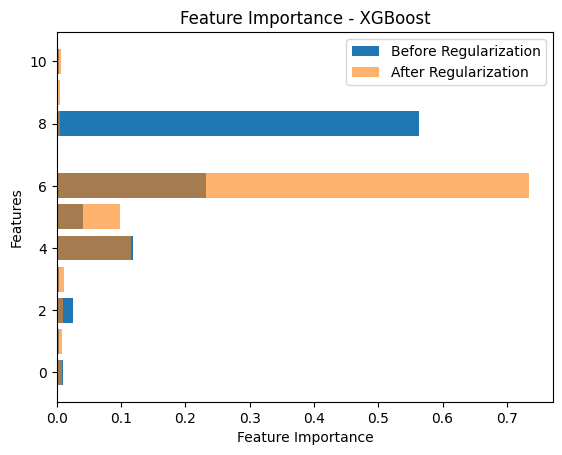

In [49]:
# Predictions before regularization
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plot_confusion_matrix(y_test, xgb_preds, "XGBoost - Before Regularization")
plot_roc_curve(y_test, xgb_probs, "XGBoost Before Regularization")

# Predictions after regularization
xgb_probs1 = xgb_model1.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, xgb_preds1, "XGBoost - After Regularization")
plot_roc_curve(y_test, xgb_probs1, "XGBoost After Regularization")

# Combine ROC Curves
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve Comparison - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

# Feature Importance before regularization
plt.barh(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_, label="Before Regularization")
# Feature Importance after regularization
plt.barh(range(len(xgb_model1.feature_importances_)), xgb_model1.feature_importances_, alpha=0.6, label="After Regularization")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.legend()
plt.show()

## ML Models Visualizations:

### Logistic Regression Visualization:

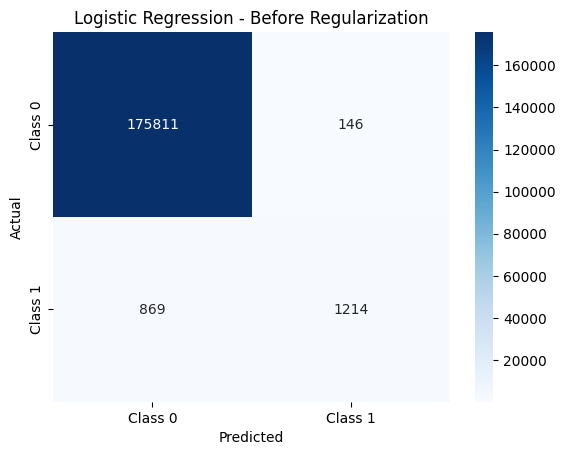

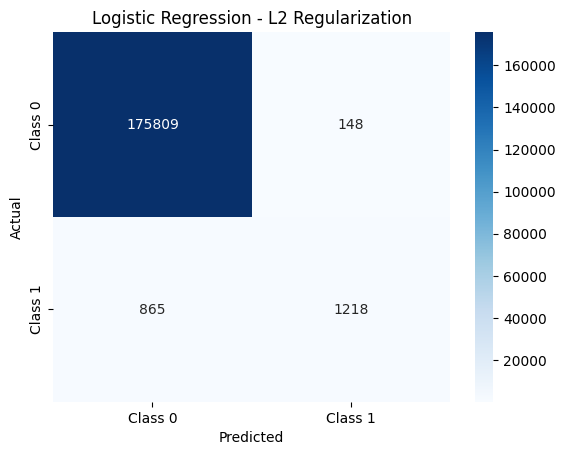

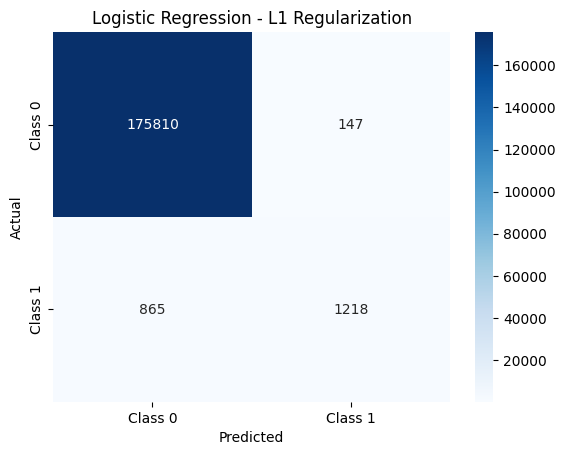

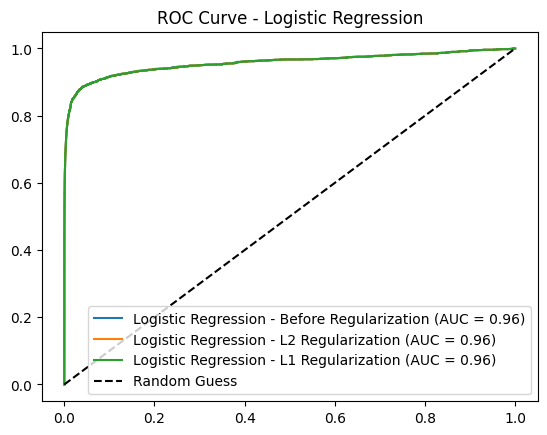

In [50]:
# Confusion Matrix
plot_confusion_matrix(y_test, logr_preds, "Logistic Regression - Before Regularization")
plot_confusion_matrix(y_test, logr_preds_l2, "Logistic Regression - L2 Regularization")
plot_confusion_matrix(y_test, logr_preds_l1, "Logistic Regression - L1 Regularization")

# ROC Curve
logr_probs = logr.predict_proba(X_test_scaled)[:, 1]
logr_l2_probs = logr_l2.predict_proba(X_test_scaled)[:, 1]
logr_l1_probs = logr_l1.predict_proba(X_test_scaled)[:, 1]

plot_roc_curve(y_test, logr_probs, "Logistic Regression - Before Regularization")
plot_roc_curve(y_test, logr_l2_probs, "Logistic Regression - L2 Regularization")
plot_roc_curve(y_test, logr_l1_probs, "Logistic Regression - L1 Regularization")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve - Logistic Regression")
plt.show()

### Decision Tree Visualization:

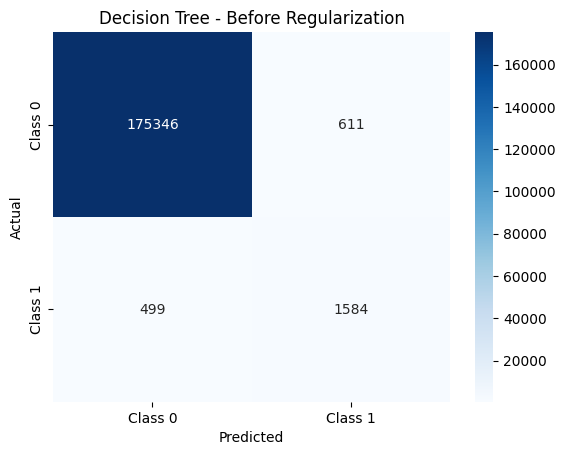

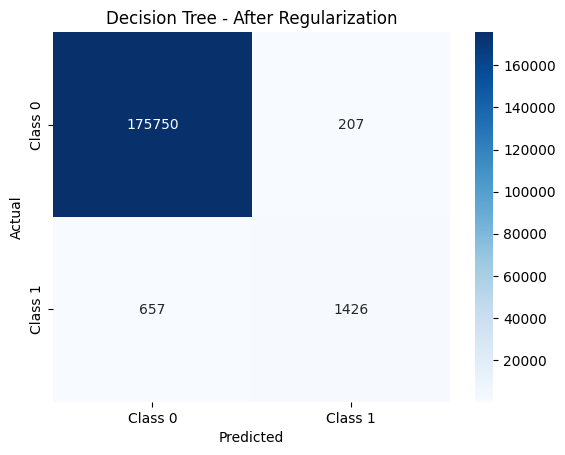

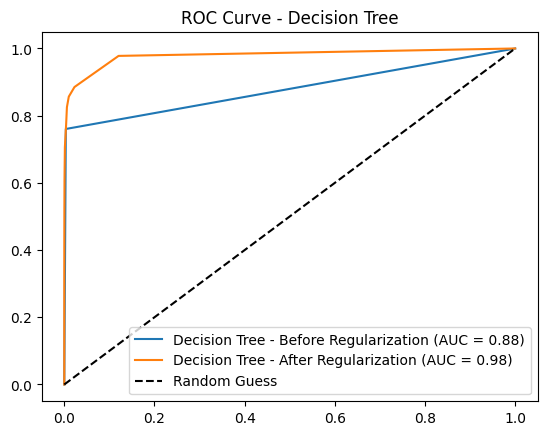

In [51]:
# Confusion Matrix
plot_confusion_matrix(y_test, dtree_preds, "Decision Tree - Before Regularization")
plot_confusion_matrix(y_test, dtree_preds_reg, "Decision Tree - After Regularization")

# ROC Curve
dtree_probs = dtree.predict_proba(X_test)[:, 1]
dtree_reg_probs = dtree_reg.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test, dtree_probs, "Decision Tree - Before Regularization")
plot_roc_curve(y_test, dtree_reg_probs, "Decision Tree - After Regularization")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve - Decision Tree")
plt.show()

### SVM Visualization:

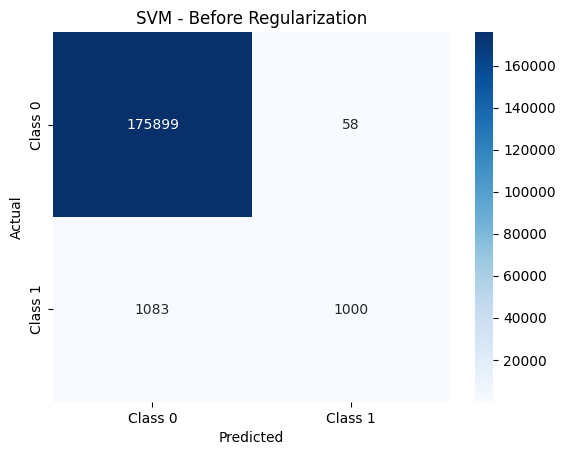

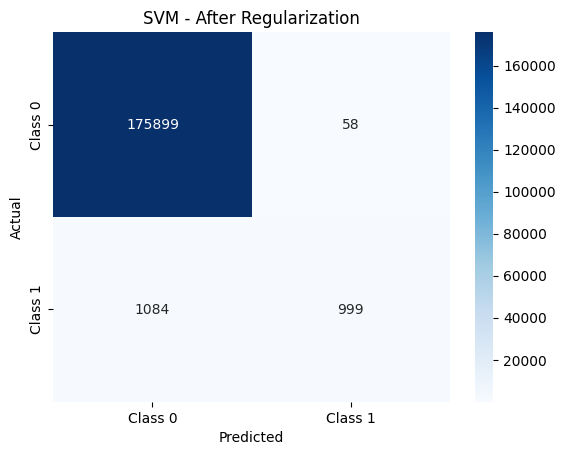

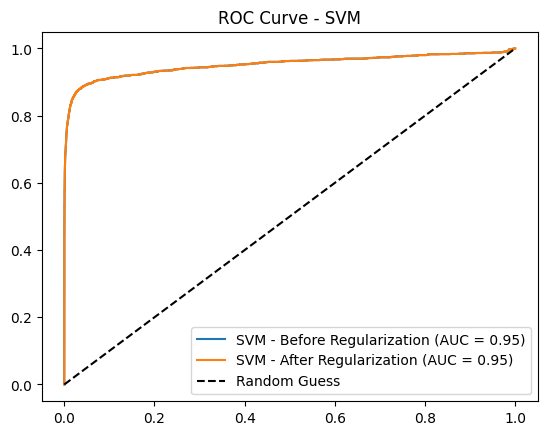

In [52]:
# Confusion Matrix
plot_confusion_matrix(y_test, cls_preds, "SVM - Before Regularization")
plot_confusion_matrix(y_test, cls_preds_reg, "SVM - After Regularization")

# ROC Curve
cls_probs = cls.decision_function(X_test_scaled)
cls_reg_probs = cls_reg.decision_function(X_test_scaled)

plot_roc_curve(y_test, cls_probs, "SVM - Before Regularization")
plot_roc_curve(y_test, cls_reg_probs, "SVM - After Regularization")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve - SVM")
plt.show()

### ANN Visualization:

5564/5564 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
5564/5564 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


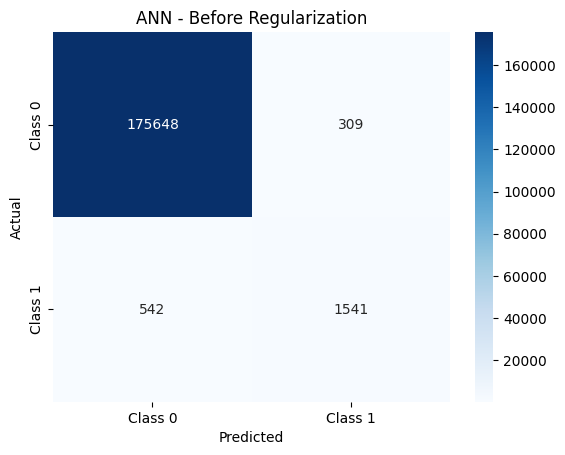

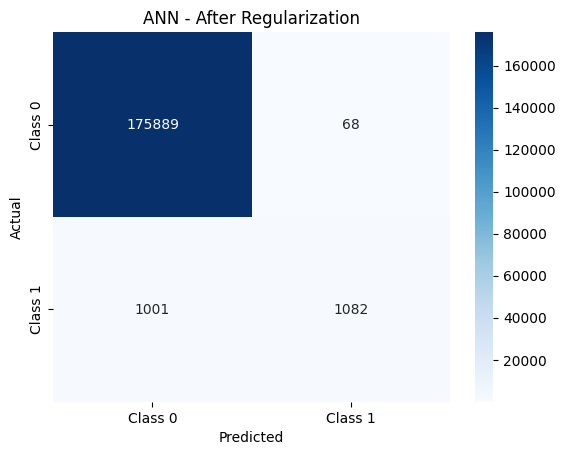

5564/5564 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
5564/5564 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


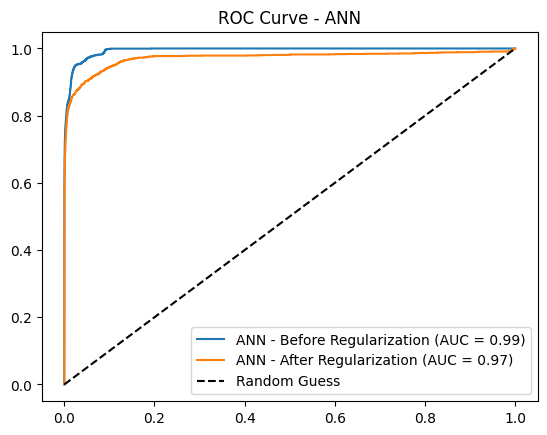

In [53]:
# Confusion Matrix
ann_preds = (ann.predict(X_test_scaled) > 0.5).astype("int32")
ann_reg_preds = (ann_reg.predict(X_test_scaled) > 0.5).astype("int32")

plot_confusion_matrix(y_test, ann_preds, "ANN - Before Regularization")
plot_confusion_matrix(y_test, ann_reg_preds, "ANN - After Regularization")

# ROC Curve
ann_probs = ann.predict(X_test_scaled).ravel()
ann_reg_probs = ann_reg.predict(X_test_scaled).ravel()

plot_roc_curve(y_test, ann_probs, "ANN - Before Regularization")
plot_roc_curve(y_test, ann_reg_probs, "ANN - After Regularization")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend(loc="lower right")
plt.title("ROC Curve - ANN")
plt.show()